# Using Tabula Sapiens as a reference for annotating new datasets
This notebook allows you to annotate your data with a number of annotation methods using the Tabula Sapiens dataset as the reference. 

Integration Methods Provided:
- scVI
- bbKNN
- scanorama

Annotation Methods:
- KNN on integrated spaces
- scANVI
- onClass
- SVM
- RandomForest

To use the notebook, simply connect to your Google Drive account, set the necessary arguments, select your methods, and run all the code blocks!

**User action is only required in Step 2 and Step 3.**

Last edited: 5/13/2021

# Step 1: Setup Environment 
No user input required here.

In [1]:
import sys
import os
import anndata
import numpy as np
import scanpy as sc
import scvi

Instructions for updating:
non-resource variables are not supported in the long term


# Step 2: Load your data (User Action Required)


In [2]:
query_fn = '/path/to/query_dataset'
query_adata = anndata.read(query_fn)

In [3]:
query_adata

AnnData object with n_obs × n_vars = 75071 × 23681
    obs: 'method', 'donor', 'cell_ontology_type', 'donor_method', 'cell_ontology_id'

## Check that query_adata.X contains raw_counts

In [5]:
from annotation import _check_nonnegative_integers

assert _check_nonnegative_integers(query_adata.X) == True, 'Make sure query_adata.X contains raw_counts'

# Step 3: Setting Up Annotation Parameters (User Action Required)

Here is where you set the parameters for the automated annotation.

Arguments:
- **save_location:** location to save results to. By default will save to a folder named `annotation_results`. It is highly recommended you provide a Google Drive folder here.
- **query_batch_key:** key in `query_adata.obs` for batch correction. Set to None for no batch correction. 
- **methods:** these are the methods to run. By default, will run all methods.
- **training_mode** can be `online` or `offline`. If `offline` will train scVI and scANVI models from scratch. If `online`, will use pretrained models.

Lesser used parameters
- **query_labels_key**: scANVI has the option to use labeled cells in the query dataset during training. To use some prelabeled cells from the query dataset, set `query_labels_key` to the corresponding key in `query_adata.obs`
- **unknown_celltype_label**: If `query_labels_key` is not None, will treat everything not labeled `unknown_celltype_label` as a labeled cell

In [6]:
save_folder = 'popv_results'
query_batch_key = ['method', 'donor']
methods = ['bbknn','scvi', 'scanvi', 'svm', 'rf', 'onclass', 'scanorama']
training_mode='offline'

# Lesser used parameters
query_labels_key=None
unknown_celltype_label='unknown'

# Step 4: Downloading Reference Data and Pretrained Models
No more user input required! Just run all the following code blocks.

## Setup the reference dataset

In [7]:
# read in the reference dataset
ref_adata_path = '/path/to/reference_dataset'
ref_adata = anndata.read(ref_adata_path)

In [8]:
assert _check_nonnegative_integers(ref_adata.X) == True, 'Make sure ref_adata.X contains raw_counts'

In [9]:
# Following parameters are specific to Tabula Sapiens dataset
ref_labels_key='cell_ontology_class'
ref_batch_key = ['donor', 'method']

In [10]:
min_celltype_size = np.min(ref_adata.obs.groupby('cell_ontology_class').size())
n_samples_per_label = np.max((min_celltype_size, 100))

In [11]:
# here we setup the query dataset with the reference dataset
import importlib
import annotation
importlib.reload(annotation)
from annotation import process_query

adata = process_query(query_adata,
                      ref_adata,
                      save_folder=save_folder,
                      query_batch_key=query_batch_key,
                      query_labels_key=query_labels_key,
                      unknown_celltype_label=unknown_celltype_label,
                      pretrained_scvi_path=None,
                      ref_labels_key=ref_labels_key, 
                      ref_batch_key=ref_batch_key,
                      training_mode=training_mode,
                      ref_adata_path=ref_adata_path,
                      n_samples_per_label=n_samples_per_label)

Sampling 100 per label


../../popv/annotation.py:395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_adata.obs["_ref_subsample"][ref_subsample_idx] = True
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/anndata/_core/merge.py:891: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:248

INFO     Using batches from adata.obs["_batch_annotation"]                                   
INFO     Using labels from adata.obs["_labels_annotation"]                                   
INFO     Using data from adata.layers["scvi_counts"]                                         
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 110753 cells, 4000 vars, 11       
         batches, 39 labels, and 0 proteins. Also registered 0 extra categorical covariates  
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.

In [12]:
adata

AnnData object with n_obs × n_vars = 110753 × 4000
    obs: 'method', 'donor', 'donor_method', 'final_annotation_cell_ontology_id', '_batch_annotation', '_labels_annotation', '_dataset', '_ref_subsample', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var'
    var: 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_training_mode', 'log1p', 'hvg', 'pca', '_scvi'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'scvi_counts'

# Step 5: Run Automated Cell Annotation Methods
No user action required. Takes about ~1 hour for a dataset for 100k cells. 

Your results will be saved to the folder you provided as **save_folder**.

There will be the following files:
- `annotated_query.h5ad` containing annotated query cells. The consensus annotations will be in `consensus_prediction`. There will also be a `consensus_percentage` field which is the percentage of methods that had the same prediction. 
- `annotated_query_plus_ref.h5ad` containing your query and the reference cells with predicted annotations. 
- `confusion_matrices.pdf` which contains the confusion matrices between the consensus_predictions and each individual method.
- `csv` files containing the metrics for each confusion matrix. 


In [13]:
import importlib
import annotation
importlib.reload(annotation)
from annotation import annotate_data

annotate_data(adata,
              methods, 
              save_folder,
              pretrained_scvi_path=None, 
              pretrained_scanvi_path=None,
              onclass_ontology_file="../../data/ontology/cl.ontology",
              onclass_obo_fp="../../data/ontology/cl.obo",
              onclass_emb_fp="../../retraining_onclass/cl.ontology.nlp.emb"
             )

Integrating data with bbknn.
Classifying with knn on bbknn distances.


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/sklearn/neighbors/_base.py:175: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  warnings.warn('Precomputed sparse input was not sorted by data.',
../../popv/annotation.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[result_key][query_idx] = knn_pred


Saved knn on bbknn results to adata.obs["knn_on_bbknn_pred"]


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
... storing 'knn_on_bbknn_pred' as categorical
... storing 'knn_on_bbknn_pred' as categorical


Running scVI.


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Training scvi offline.
Epoch 72/72: 100%|██████████| 72/72 [39:11<00:00, 32.66s/it, loss=792, v_num=1]   
Classifying with knn on scVI latent space.
Training knn on scvi latent space. Using latent space in adata.obsm["X_scvi_offline"]


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
../../popv/annotation.py:934: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[result_key][query_idx] = knn_pred
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
... storing 'knn_on_scvi_offline_pred' as categorical
... storing 'knn_on_scvi_offline_pred' as categorical


Running scANVI.
INFO     Training for 72 epochs.                                                             


GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 72/72: 100%|██████████| 72/72 [1:52:43<00:00, 93.94s/it, loss=954, v_num=1]     


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
... storing 'scanvi_offline_pred' as categorical
... storing 'scanvi_offline_pred' as categorical


Classifying with SVM.


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
../../popv/annotation.py:843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[save_key][test_idx] = svm_pred
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
... storing 'svm_pred' as categorical
... storing 'svm_pred' as categorical


Classifying with random forest.
Training random forest classifier with 2966 cells


../../popv/annotation.py:754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[save_key][test_idx] = rf_pred
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
... storing 'rf_pred' as categorical
... storing 'rf_pred' as categorical


Running OnClass.
init OnClass
35682 4000 38 2357
Training cost after epoch 1: loss:18.662193 acc: 0.871 auc: 0.957 auprc: 0.617


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 2: loss:6.820107 acc: 0.897 auc: 0.983 auprc: 0.750


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 3: loss:5.815870 acc: 0.907 auc: 0.988 auprc: 0.791


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 4: loss:3.995255 acc: 0.909 auc: 0.989 auprc: 0.823


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 5: loss:4.001249 acc: 0.906 auc: 0.991 auprc: 0.849


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 6: loss:3.467407 acc: 0.931 auc: 0.993 auprc: 0.887


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 7: loss:4.375085 acc: 0.930 auc: 0.992 auprc: 0.891


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 8: loss:3.151454 acc: 0.918 auc: 0.993 auprc: 0.866


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 9: loss:3.833392 acc: 0.933 auc: 0.995 auprc: 0.917


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 10: loss:4.967805 acc: 0.935 auc: 0.995 auprc: 0.901


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 11: loss:3.554501 acc: 0.943 auc: 0.995 auprc: 0.915


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 12: loss:3.096486 acc: 0.940 auc: 0.991 auprc: 0.892


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 13: loss:4.563905 acc: 0.942 auc: 0.996 auprc: 0.923


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 14: loss:2.413857 acc: 0.943 auc: 0.992 auprc: 0.926


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 15: loss:1.803551 acc: 0.950 auc: 0.995 auprc: 0.938


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 16: loss:1.620005 acc: 0.955 auc: 0.997 auprc: 0.948


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 17: loss:1.546206 acc: 0.956 auc: 0.997 auprc: 0.953


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 18: loss:1.471489 acc: 0.957 auc: 0.998 auprc: 0.960


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 19: loss:1.411518 acc: 0.959 auc: 0.998 auprc: 0.960


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Training cost after epoch 20: loss:1.509791 acc: 0.949 auc: 0.997 auprc: 0.946


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/numpy/lib/format.py:350: UserWarning: metadata on a dtype may be saved or ignored, but will raise if saved when read. Use another form of storage.
  d['descr'] = dtype_to_descr(array.dtype)
Trying to set attribute `.obs` of view, copying.
../../popv/annotation.py:810: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_adata.obs[save_key][i : i + shard_size] = pred_label_str
../../popv/annotation.py:810: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

Running scanorama.
Found 4000 genes among all datasets
[[0.         0.46931445 0.71869869 0.06179551 0.02275862 0.13062409
  0.04371921 0.05438402 0.18459995 0.05896731 0.05397859]
 [0.         0.         0.43992627 0.17779199 0.07701149 0.31059507
  0.06870539 0.04661487 0.18610484 0.59150626 0.07445323]
 [0.         0.         0.         0.27779998 0.08505747 0.59216255
  0.17814658 0.20976693 0.38700778 0.16681943 0.47045137]
 [0.         0.         0.         0.         0.12183908 0.53701016
  0.29106946 0.26415094 0.23877602 0.03971891 0.10376919]
 [0.         0.         0.         0.         0.         0.0203193
  0.23977011 0.04994451 0.05402299 0.00855484 0.00465333]
 [0.         0.         0.         0.         0.         0.
  0.23076923 0.26526082 0.38606676 0.26560232 0.26560232]
 [0.         0.         0.         0.         0.         0.
  0.         0.67036626 0.30448959 0.04735716 0.08050256]
 [0.         0.         0.         0.         0.         0.
  0.         0.     

/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
../../popv/annotation.py:962: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[result_key][query_idx] = knn_pred
/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
... storing 'knn_on_scanorama_pred' as categorical
... storing 'knn_on_scanorama_pred' as categorical


['knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf_pred', 'onclass_pred', 'knn_on_scanorama_pred']


... storing 'consensus_prediction' as categorical
... storing 'consensus_percentage' as categorical
... storing 'consensus_prediction' as categorical
... storing 'consensus_percentage' as categorical


# Step 6 Generate Statistics and Figures
No user action required.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

results_file = os.path.join(save_folder,'annotated_query_plus_ref.h5ad')
results = anndata.read(results_file)

Making confusion matrix for knn_on_bbknn_pred
Making confusion matrix for knn_on_scvi_offline_pred
Making confusion matrix for scanvi_offline_pred
Making confusion matrix for svm_pred
Making confusion matrix for rf_pred
Making confusion matrix for onclass_pred
Making confusion matrix for knn_on_scanorama_pred


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


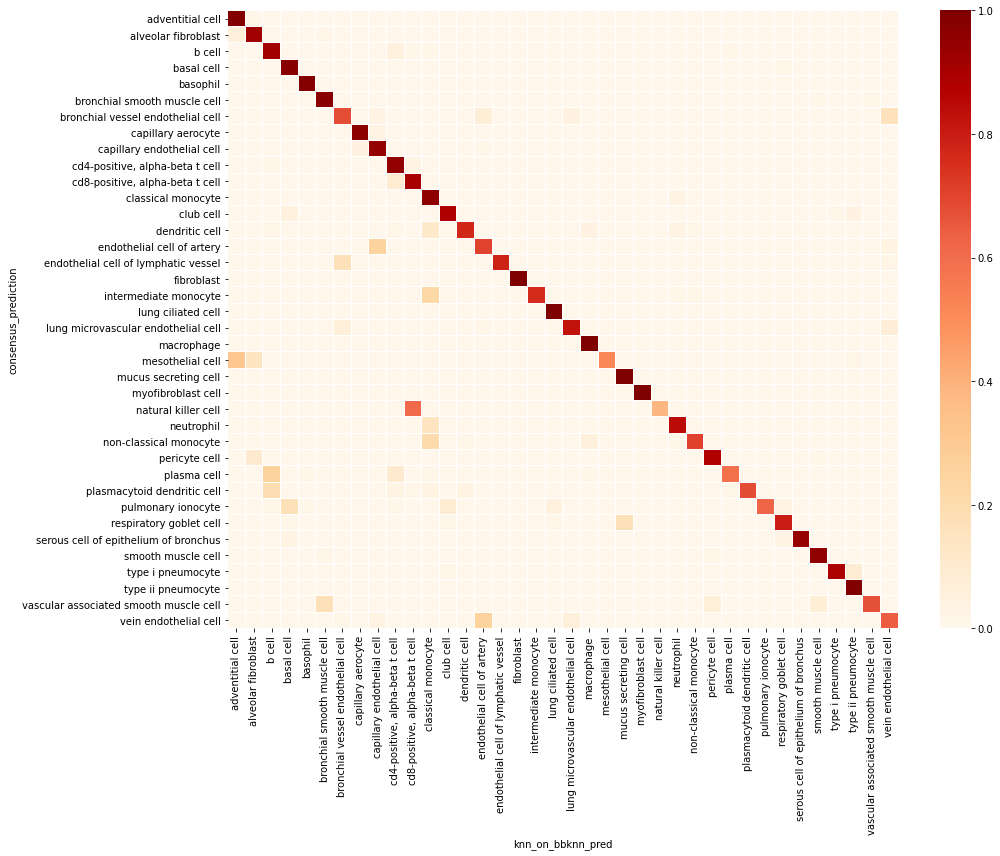

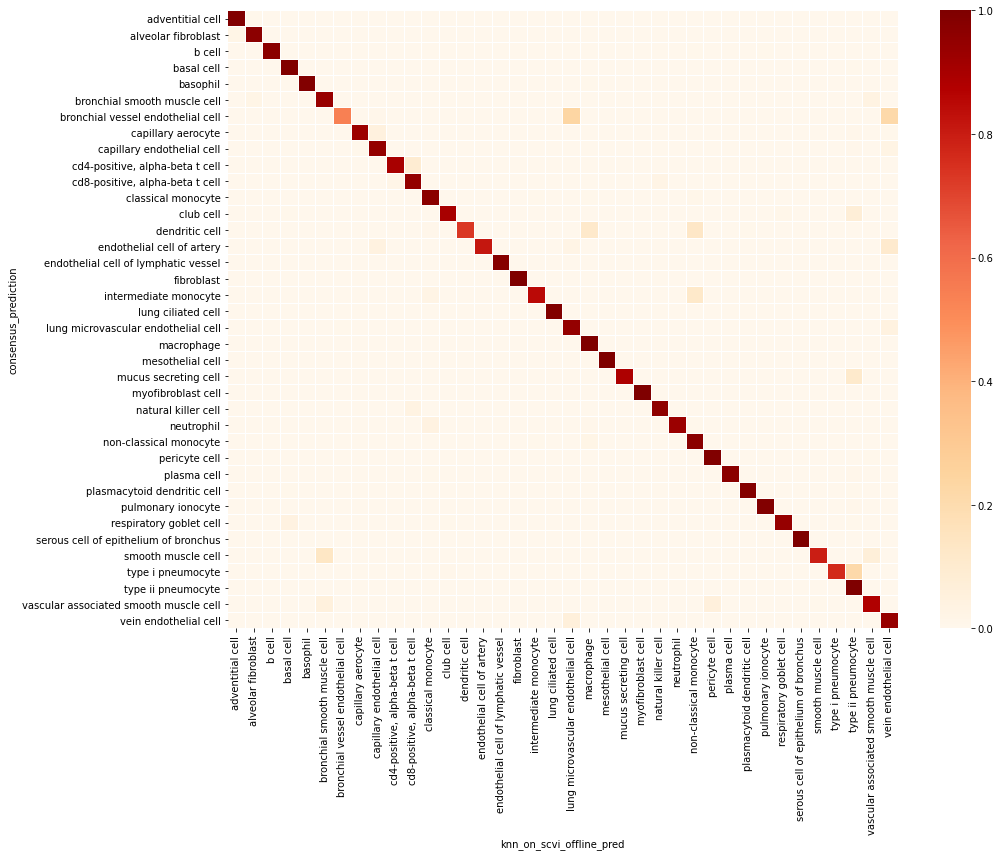

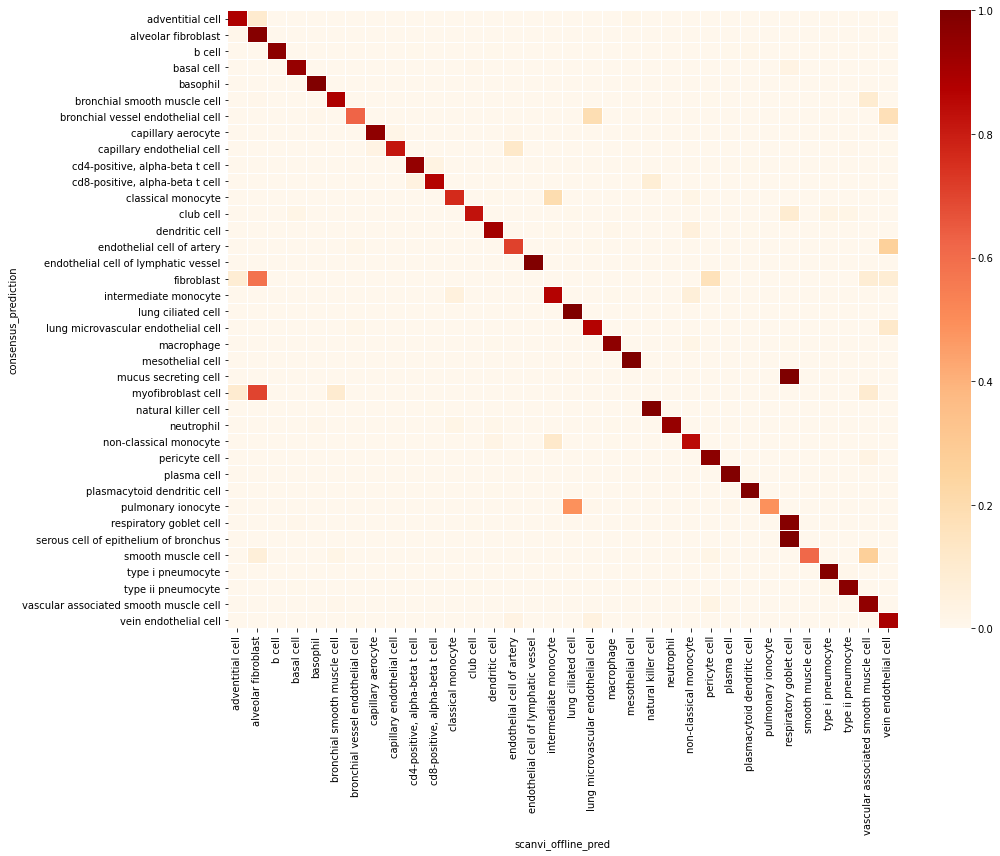

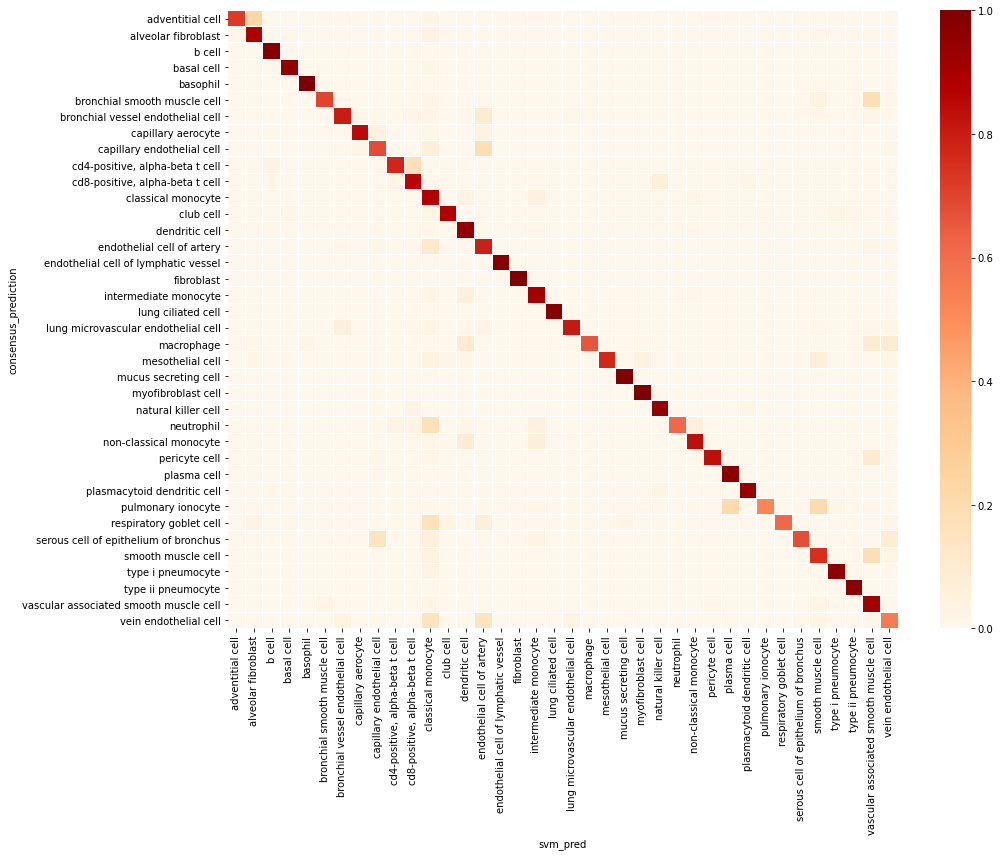

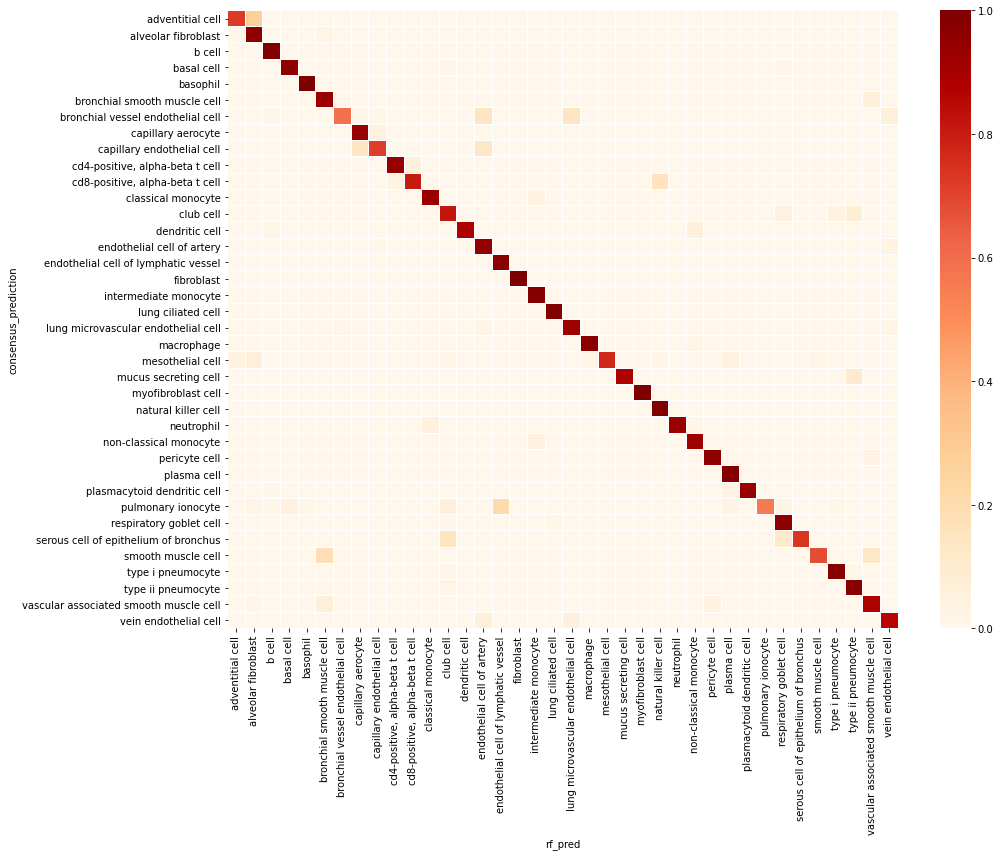

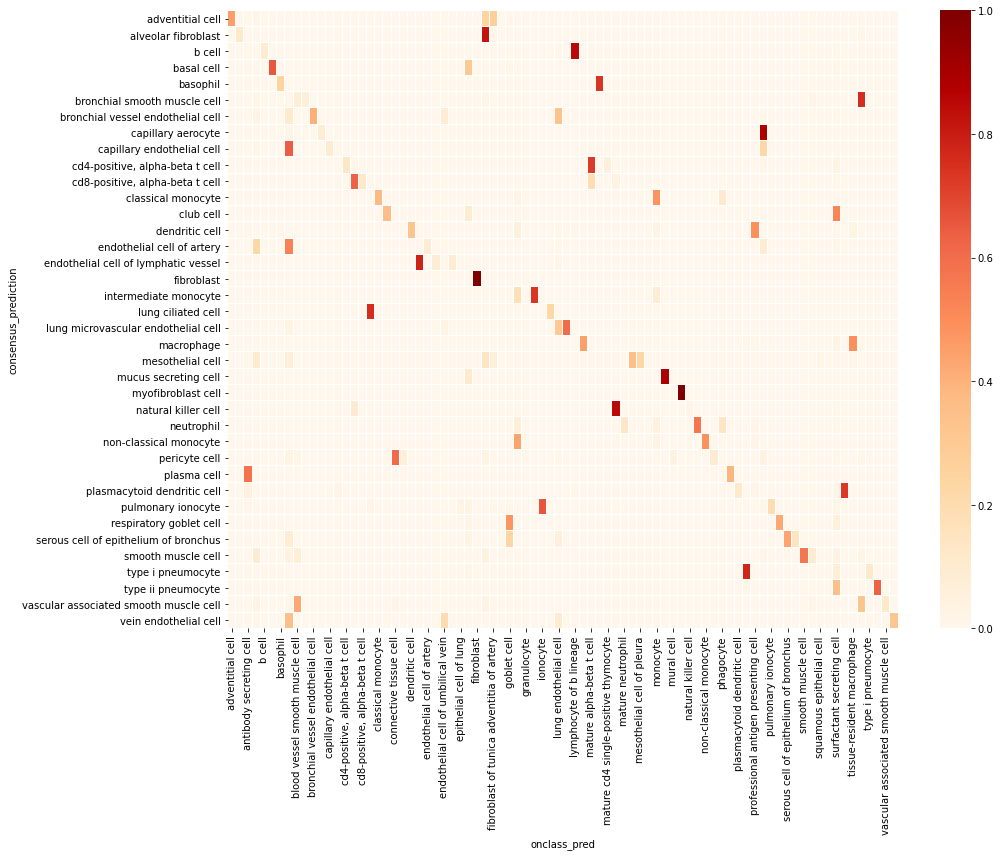

In [15]:
from annotation import make_agreement_plots
all_prediction_keys = [
        "knn_on_bbknn_pred",
        "knn_on_scvi_online_pred",
        "knn_on_scvi_offline_pred",
        "scanvi_online_pred",
        "scanvi_offline_pred",
        "svm_pred",
        "rf_pred",
        "onclass_pred",
        "knn_on_scanorama_pred",
    ]

obs_keys = adata.obs.keys()
pred_keys = [key for key in obs_keys if key in all_prediction_keys]
make_agreement_plots(results, methods=pred_keys, save_folder=save_folder)

is_query = results.obs._dataset == "query"
methods = [x for x in results.obs.columns if x.endswith("_pred")]
labels = results.obs.consensus_prediction.astype(str)
labels[~is_query] = results[~is_query].obs._labels_annotation.astype(str)
celltypes = np.unique(labels)
latent_methods = results.obsm.keys()

### Distribution of consensus percentage
The more the algorithms agree with each other, the better the annotation has worked

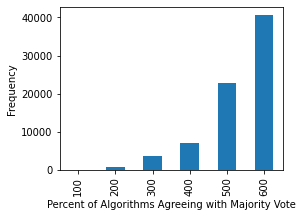

In [16]:
agreement_counts = pd.DataFrame(
    np.unique(results[is_query].obs["consensus_percentage"], return_counts=True)
).T

agreement_counts.columns = ["Percent Agreement", "Count"]
agreement_counts.plot.bar(
    x="Percent Agreement", y="Count", legend=False, figsize=(4, 3)
)
plt.ylabel("Frequency")
plt.xlabel("Percent of Algorithms Agreeing with Majority Vote")
figpath = os.path.join(save_folder, "Concensus_Percentage_barplot.pdf")
plt.savefig(figpath, bbox_inches="tight")

### Per cell type agreement
Some cell types can be better predicted than others, and we can highlight the celltypes that are poorly predicted by looking at the per celltype agreement. The cell types are separated by the concensus predictions.

/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


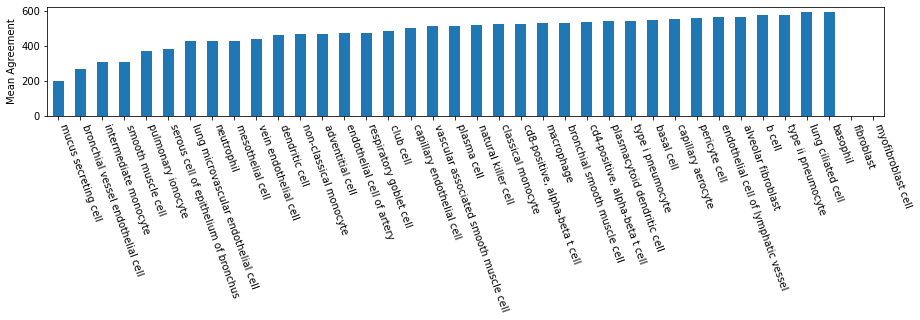

In [17]:
mean_agreement = [
    np.mean(results[is_query & (labels == x)].obs["consensus_percentage"].astype(float))
    for x in celltypes
]
mean_agreement = pd.DataFrame([mean_agreement], index=["agreement"]).T
mean_agreement.index = celltypes

mean_agreement = mean_agreement.sort_values("agreement", ascending=True)
mean_agreement.plot.bar(y="agreement", figsize=(15, 2), legend=False)
plt.ylabel("Mean Agreement")
plt.xticks(rotation=290, ha="left")
figpath = os.path.join(save_folder, "percelltype_agreement_barplot.pdf")
plt.savefig(figpath, bbox_inches="tight")

### Cell type proportion plot

In [18]:
prop = pd.DataFrame(index=celltypes, columns=["ref", "query"])
for x in celltypes:
    prop.loc[x, "query"] = np.sum(labels[is_query] == x)
    prop.loc[x, "ref"] = np.sum(labels[~is_query] == x)


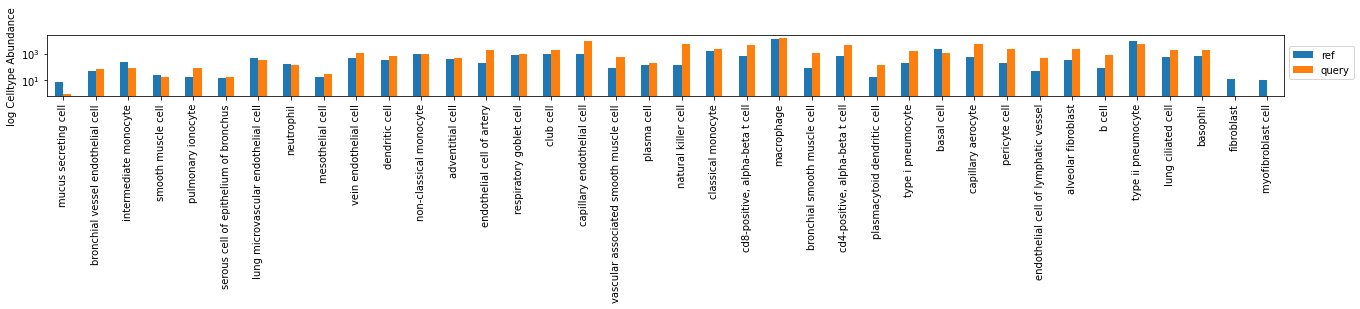

In [19]:
prop.loc[mean_agreement.index].plot(kind='bar', figsize=(len(celltypes)*0.5,4),logy=True)
plt.legend(bbox_to_anchor=(1, 0.9))
plt.ylabel('log Celltype Abundance')
plt.tight_layout()
figpath = os.path.join(save_folder, 'celltype_prop_barplot.pdf')
plt.savefig(figpath, bbox_inches="tight")
plt.show()
plt.close()


In [ ]:
from annotation import prediction_eval
prediction_eval(
            query_adata.obs['cell_ontology_type'],
            adata.obs['consensus_prediction'][query_adata.obs_names],
            name='method',
            x_label='LCA',
            y_label='consensus_prediction',
            res_dir=save_folder,
        )